In [4]:
%%bash
# The following line ensures that cell runs only in Google Colab
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit 
echo "You are running in colab, getting data"
wget -q https://github.com/paulyurlov/DataVisualization/archive/main.zip
unzip -qq main.zip DataVisualization-main/Data/*
rm -rf Data/ main.zip
cp -r DataVisualization-main/Data/. Data/
rm -rf DataVisualization-main/

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import date


def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


plt.style.use("ggplot")

# Часть 1

In [6]:
df = pd.read_csv('Data/prog_workers.csv')
df

,Firstname,Lastname,Country,Date,Decimal number,Experience,Prog_Language
0,Jolyn,Elsinore,Brazil,16-01-1981,8672.38,3,Basic
1,Candi,Fax,Norfolk Island,21-03-1998,15095.28,5,C#
2,Jessy,Gillan,Central African Republic,02-10-1985,28243.89,2,С++
3,Benita,Tice,French Southern Territories,17-08-1975,24273.18,1,С++
4,Arlina,Peonir,Canada,25-12-1993,26938.66,3,PHP
...,...,...,...,...,...,...,...
1495,Gloria,Sheng,Mongolia,15-05-1999,16805.69,2,C#
1496,Kimberley,Maxi,Argentina,06-02-1982,15323.02,5,Assembler
1497,Roxane,Shirberg,Hong Kong,20-01-1980,7010.41,1,Assembler
1498,Nickie,Ahab,Iceland,03-08-1970,12453.41,5,Java


/tmp/ipykernel_10606/3691238029.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][2].set_xticklabels(ax[0][1].get_xticklabels(), rotation=40)


KeyError: 'dob'

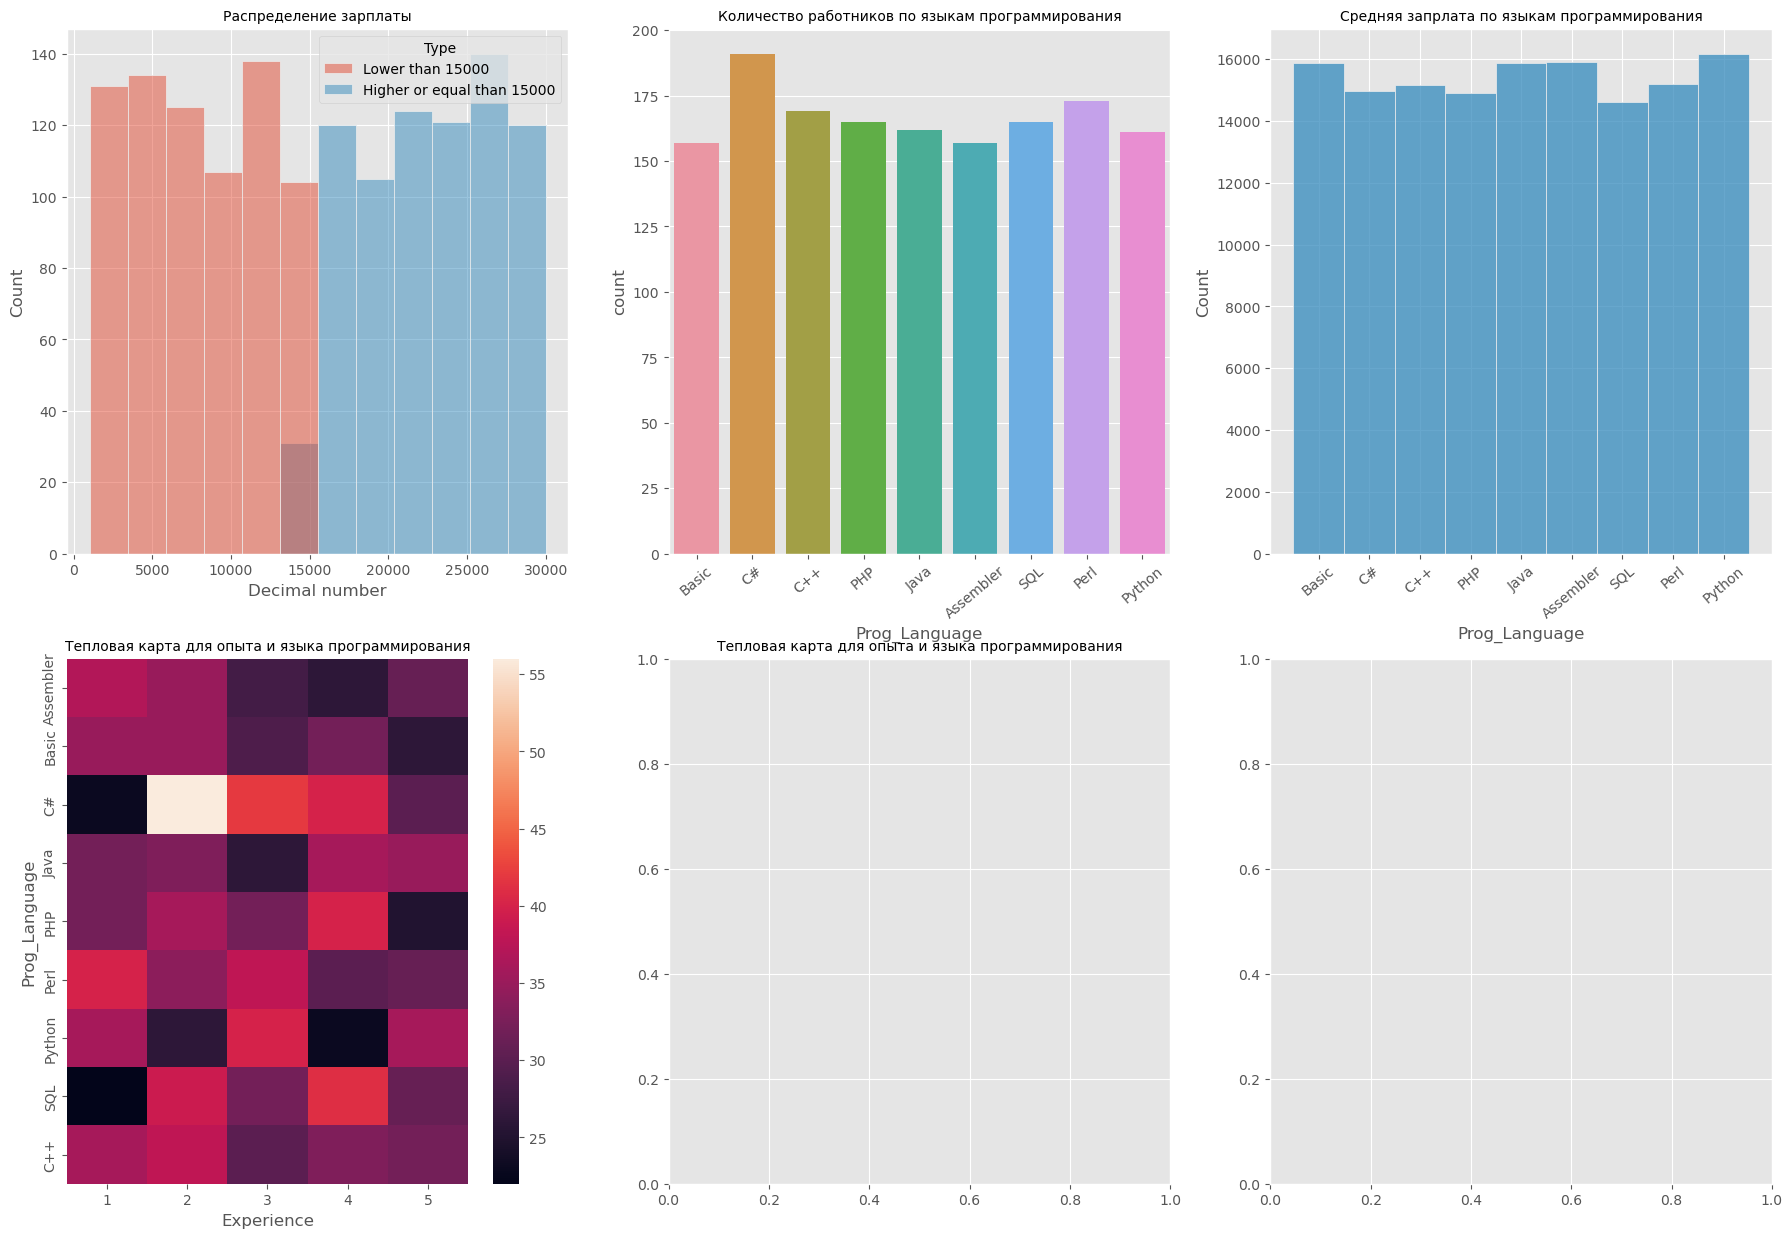

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(22, 15))

df['Type'] = 'Lower than 15000'
df.loc[df['Decimal number'] >= 15000, 'Type'] = 'Higher or equal than 15000'
ax[0][0].set_title('Распределение зарплаты', fontsize=10)
sns.histplot(data=df, x='Decimal number', hue='Type', ax=ax[0][0])

ax[0][1].set_title('Количество работников по языкам программирования', fontsize=10)
sns.countplot(data=df, x='Prog_Language', ax=ax[0][1])
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=40)

tmp = df.groupby(by=['Prog_Language']).mean()
tmp.reset_index()
ax[0][2].set_title('Средняя запрлата по языкам программирования', fontsize=10)
sns.histplot(data=tmp, x='Prog_Language', weights=tmp['Decimal number'], ax=ax[0][2])
ax[0][2].set_xticklabels(ax[0][1].get_xticklabels(), rotation=40)

tmp = df.groupby(['Prog_Language', 'Experience']).count().reset_index().pivot(index='Prog_Language', columns='Experience', values='Type')
ax[1][0].set_title('Тепловая карта для опыта и языка программирования', fontsize=10)
sns.heatmap(data=tmp, ax=ax[1][0])

ax[1][1].set_title('Тепловая карта для опыта и языка программирования', fontsize=10)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['age'] = (date - df['dob']).astype('<m8[Y]') 
sns.scatterplot(data=df, x='Decimal number', y='age', hue='age', ax=ax[1][1])





# Часть 2

In [9]:
df = pd.read_csv('Data/Visa_countries.csv', encoding='cp1251')
df

,№,Перечень стран,Режим въезда с дипломатическим паспортом,Режим въезда со служебным паспортом,Режим въезда с общегражданским паспортом
0,1,Абхазия,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Безвизовый (до 90 дней)
1,2,Австралия,Визовый,Визовый,Визовый
2,3,Австрия,Безвизовый (до 90 дней в течение 180 дней),Визовый,Визовый
3,4,Азербайджан,Безвизовый,Безвизовый,Безвизовый
4,5,Албания,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Визовый
...,...,...,...,...,...
191,192,ЮАР,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Безвизовый (до 90 дней)
192,193,Южная Осетия,Безвизовый,Безвизовый,Безвизовый
193,194,Южный Судан,Визовый,Визовый,Визовый
194,195,Ямайка,Безвизовый (до 90 дней),Безвизовый (до 90 дней),Безвизовый (до 30 дней)


<AxesSubplot:xlabel='count', ylabel='Режим въезда с общегражданским паспортом'>

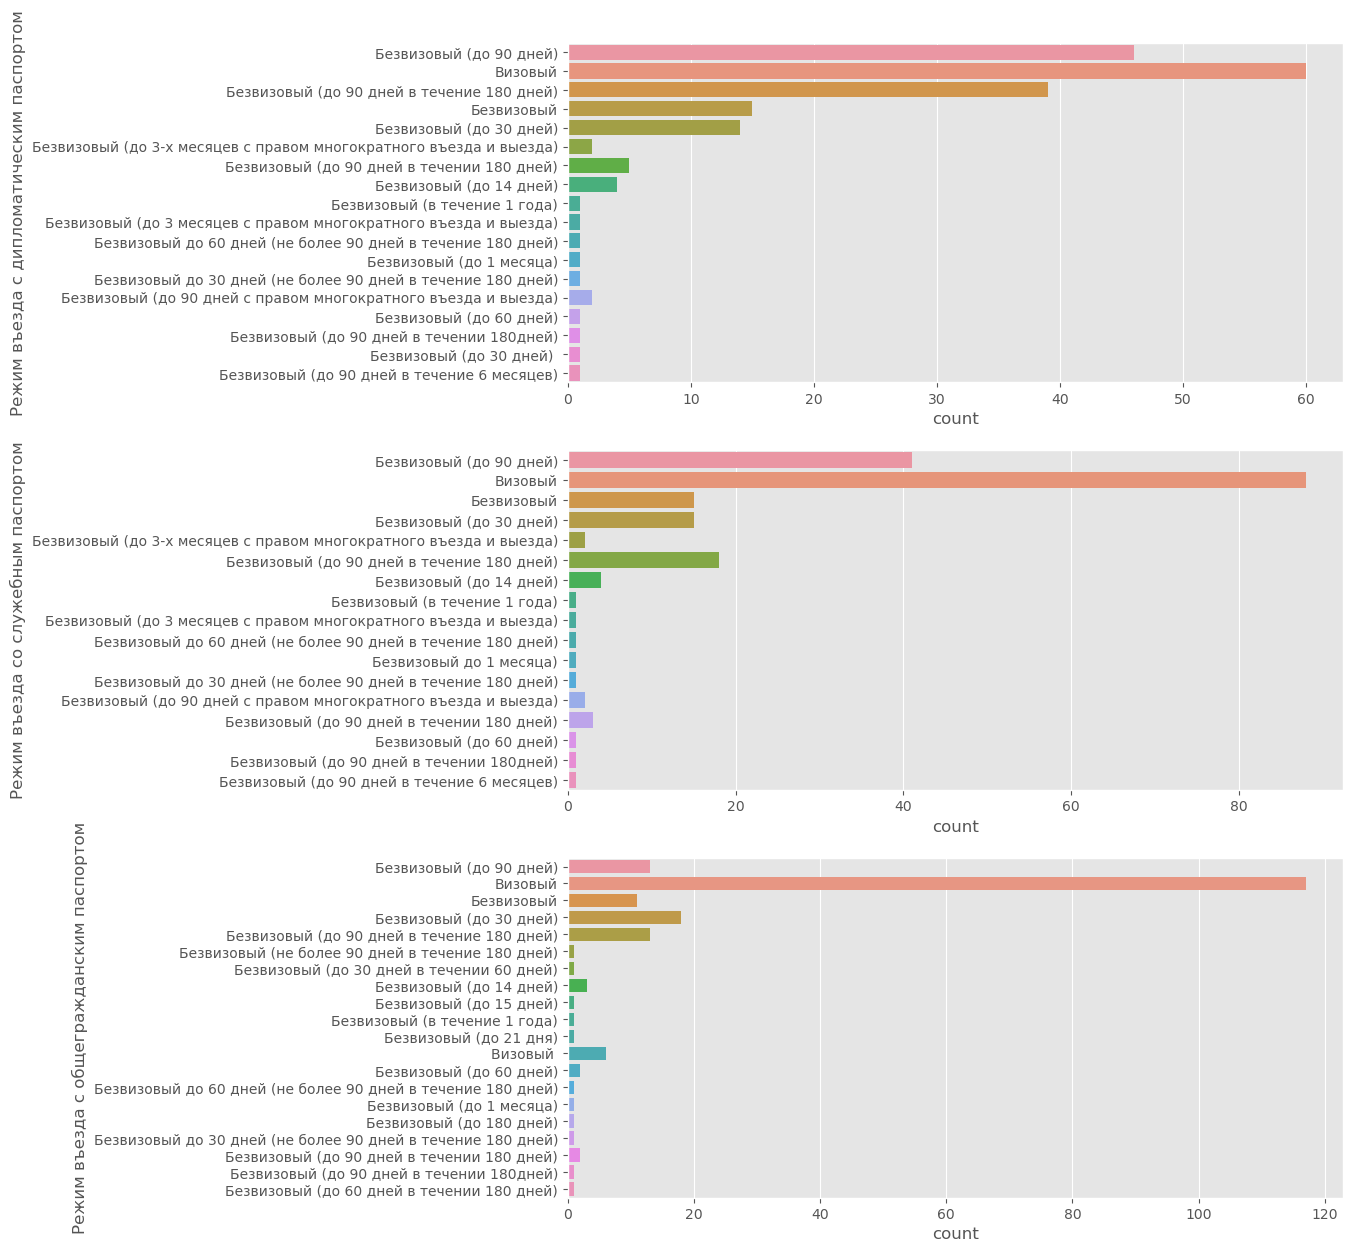

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

sns.countplot(data=df, y='Режим въезда с дипломатическим паспортом', orient='v', ax=ax[0])
sns.countplot(data=df, y='Режим въезда со служебным паспортом', orient='v', ax=ax[1])
sns.countplot(data=df, y='Режим въезда с общегражданским паспортом', orient='v', ax=ax[2])

In [15]:
df.columns

Index(['№', 'Перечень стран', 'Режим въезда с дипломатическим паспортом',
       'Режим въезда со служебным паспортом',
       'Режим въезда с общегражданским паспортом'],
      dtype='object')

,Режим въезда с дипломатическим паспортом,Режим въезда со служебным паспортом,Режим въезда с общегражданским паспортом,№,Перечень стран
0,Безвизовый,Безвизовый,Безвизовый,11,11
1,Безвизовый,Безвизовый,Визовый,3,3
2,Безвизовый,Безвизовый,Визовый,1,1
3,Безвизовый (в течение 1 года),Безвизовый (в течение 1 года),Безвизовый (в течение 1 года),1,1
4,Безвизовый (до 1 месяца),Безвизовый до 1 месяца),Безвизовый (до 1 месяца),1,1
5,Безвизовый (до 14 дней),Безвизовый (до 14 дней),Безвизовый (до 14 дней),3,3
6,Безвизовый (до 14 дней),Безвизовый (до 14 дней),Безвизовый (до 30 дней),1,1
7,Безвизовый (до 3 месяцев с правом многократног...,Безвизовый (до 3 месяцев с правом многократног...,Безвизовый (до 30 дней),1,1
8,Безвизовый (до 3-х месяцев с правом многократн...,Безвизовый (до 3-х месяцев с правом многократн...,Безвизовый (до 90 дней в течение 180 дней),1,1
9,Безвизовый (до 3-х месяцев с правом многократн...,Безвизовый (до 3-х месяцев с правом многократн...,Безвизовый (не более 90 дней в течение 180 дней),1,1


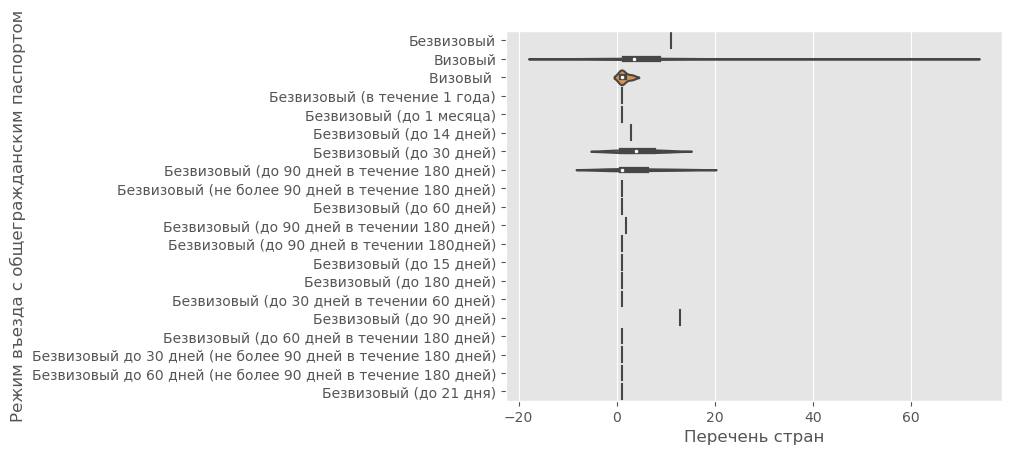

In [18]:
tmp = df.groupby(by=['Режим въезда с дипломатическим паспортом',
       'Режим въезда со служебным паспортом',
       'Режим въезда с общегражданским паспортом']).count().reset_index()
sns.violinplot(data=tmp, x="Перечень стран", y="Режим въезда с общегражданским паспортом")
tmp